# **Heart Disease Prediction**

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

Loading the required csv file

In [ ]:
# loading the required csv file
data = pd.read_csv('/content/drive/MyDrive/HeartDiseasePrediction/heart_disease_data.csv')

In [ ]:
# print the data head
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [ ]:
# getting the no. of rows and columns in the dataset
data.shape

(303, 14)

In [ ]:
# Returns an object with all of the column headers
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# getting the number of null/missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# getting statistical measures of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


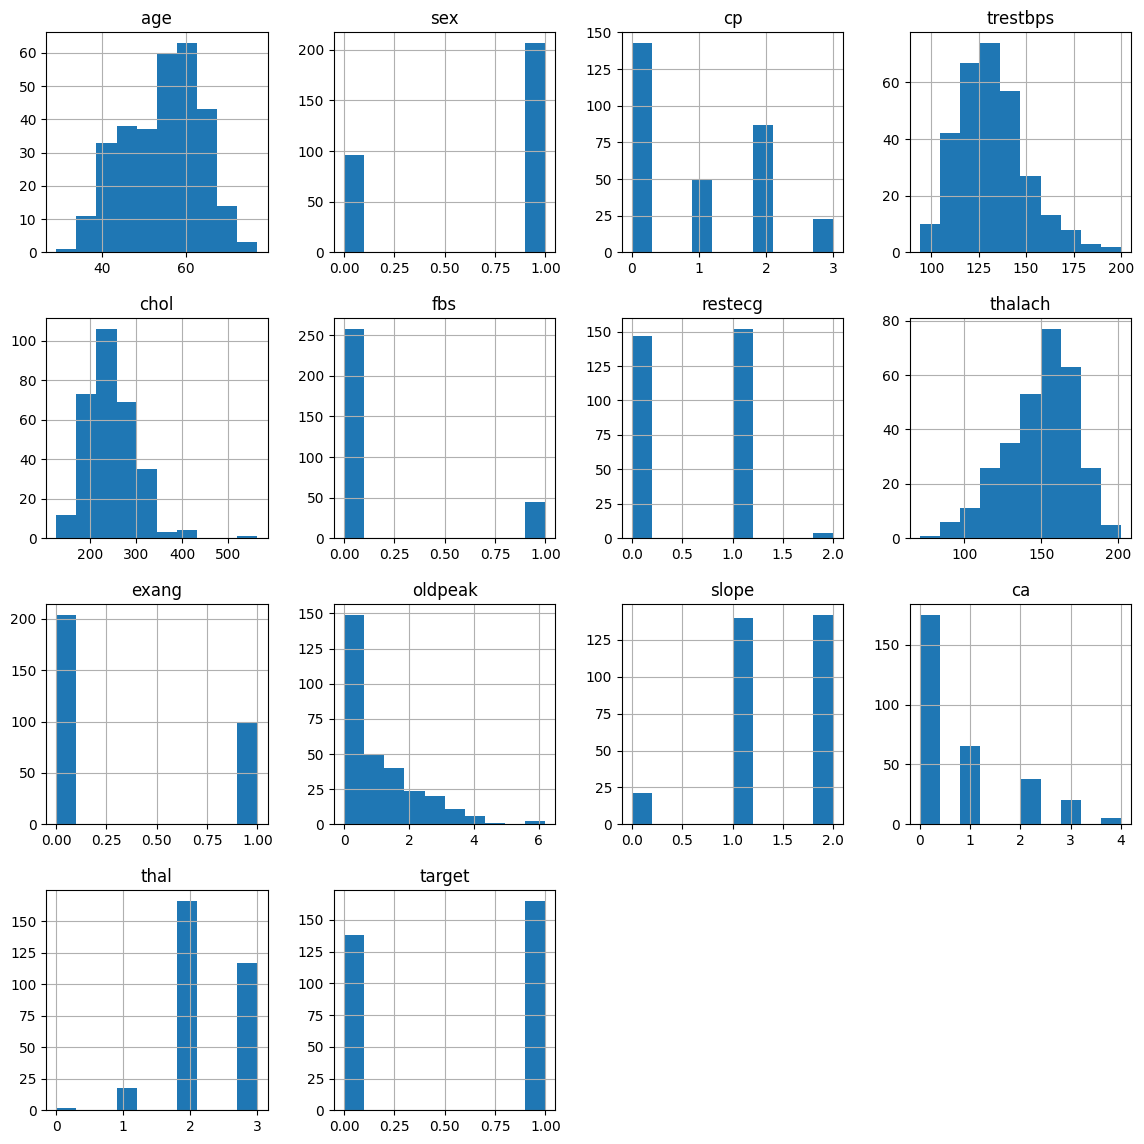

In [ ]:
# plotting each features
data.hist(figsize=(14,14))
plt.show()

In [ ]:
# plotting all features pairwise
sns.pairplot(data, hue="target")

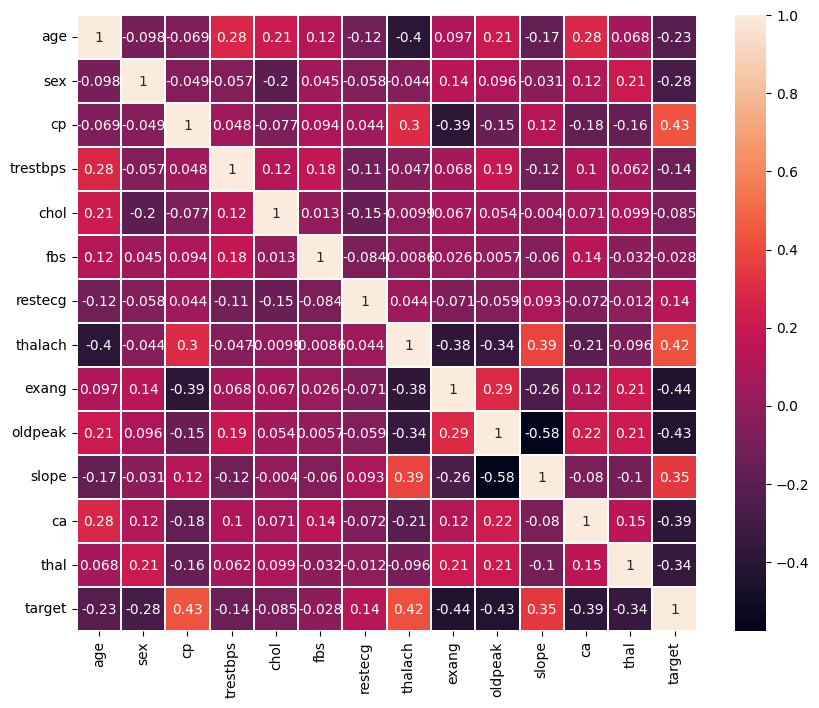

In [ ]:
# creating a correlation heatmap
sns.heatmap(data.corr(),annot = True, linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

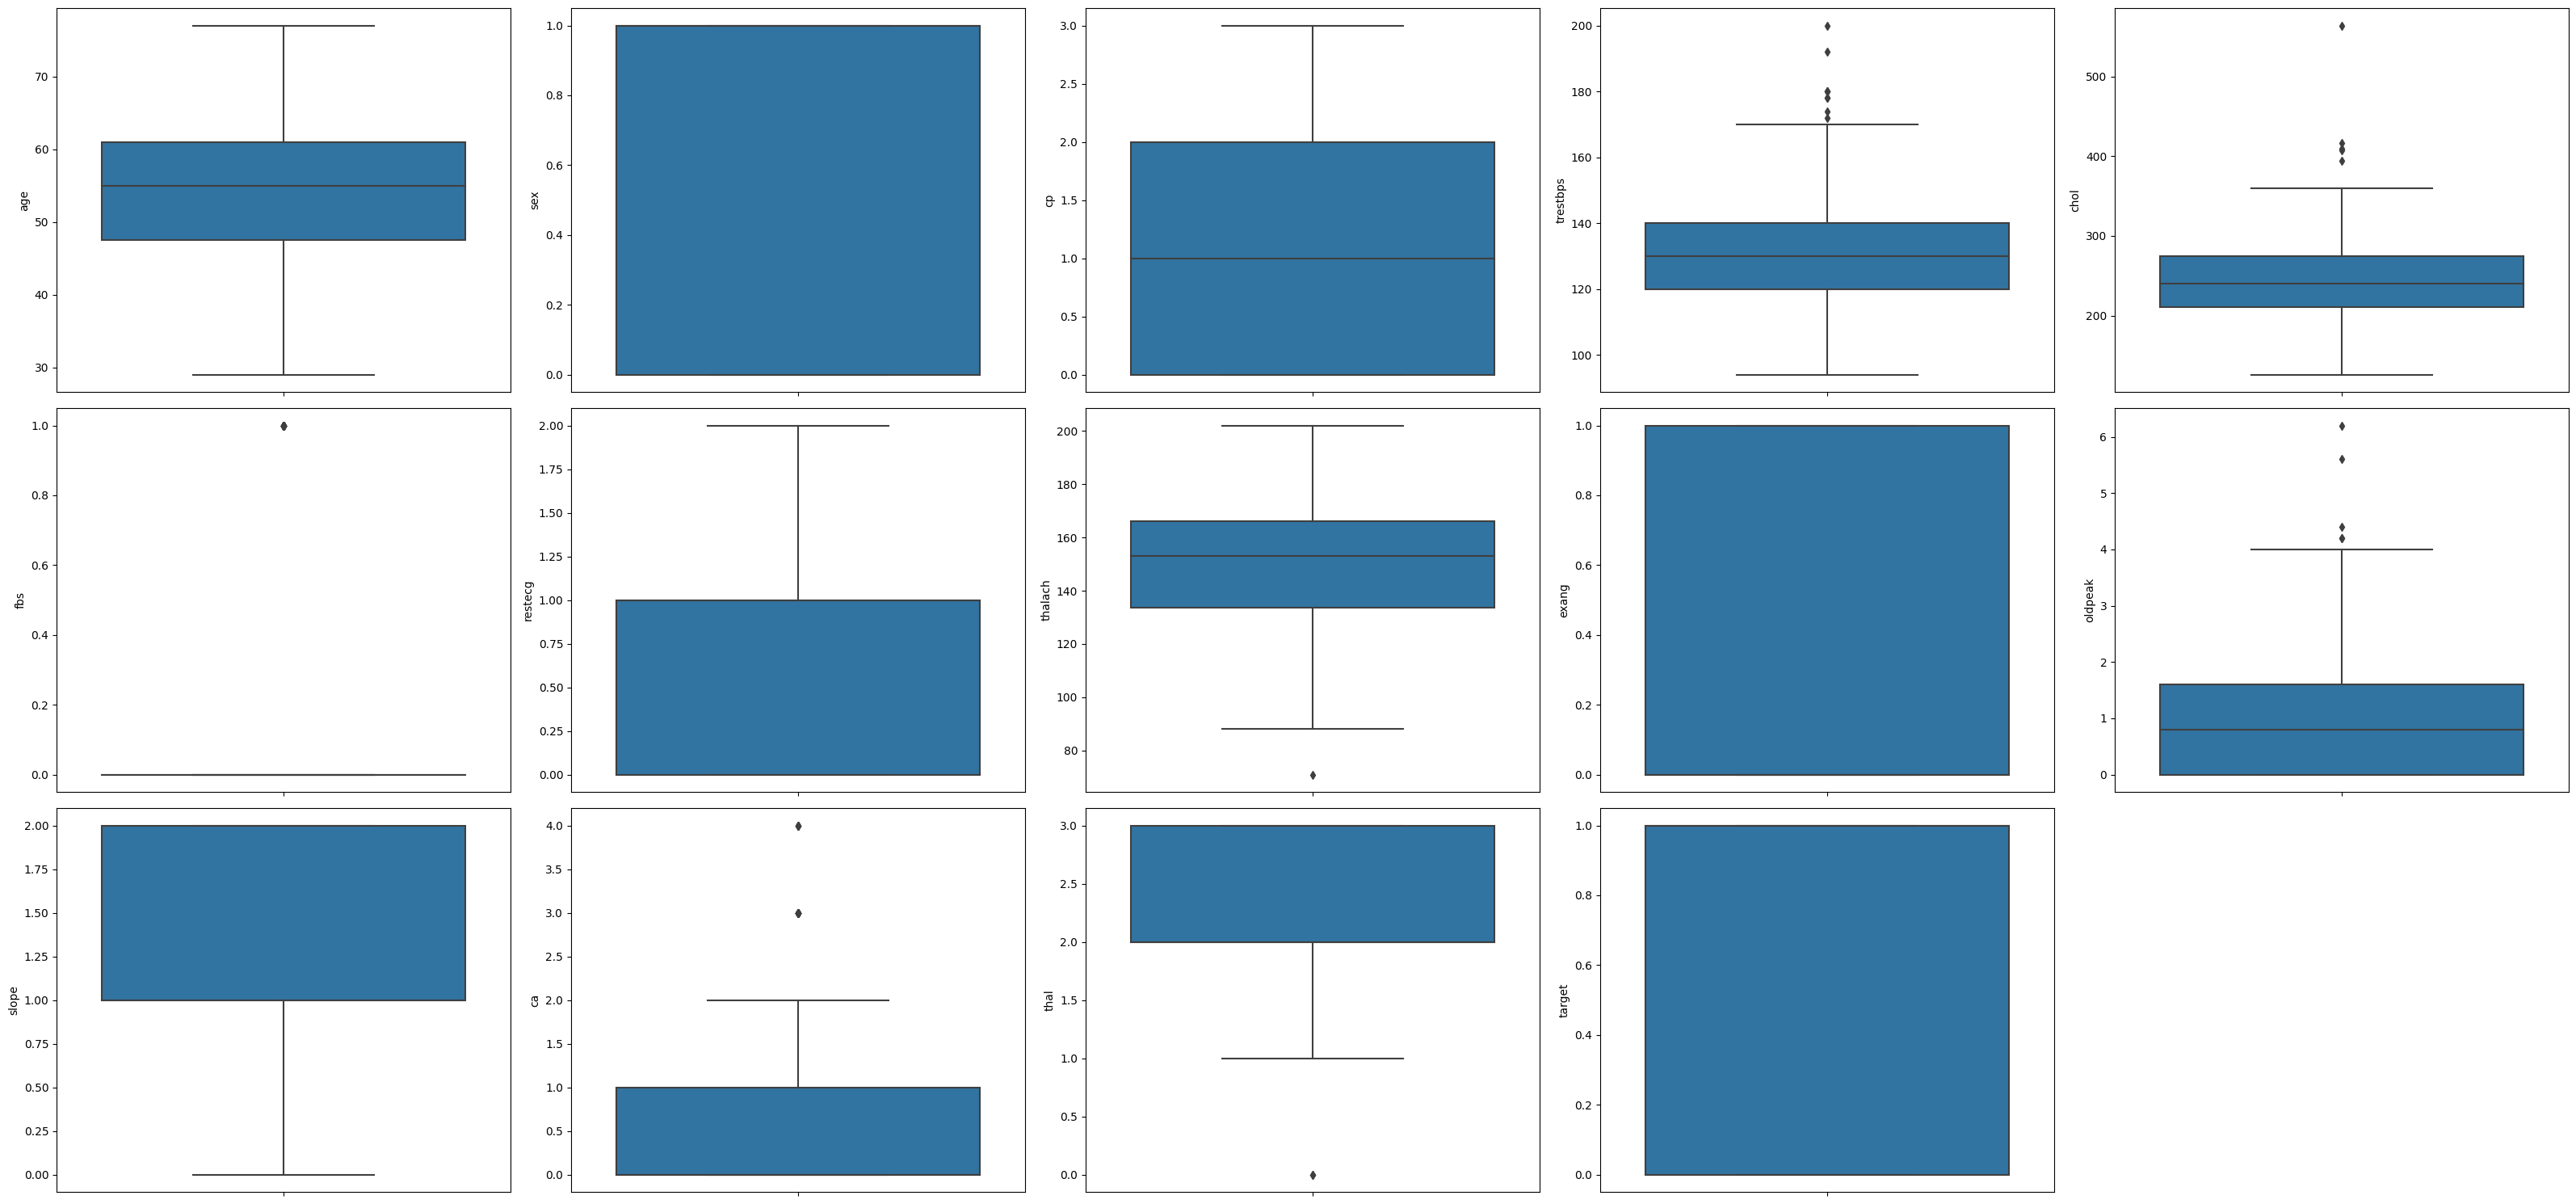

In [ ]:
# checking for outliers
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 5 + 1  # Calculate the number of rows based on the number of columns

fig, ax = plt.subplots(ncols=5, nrows=num_rows, figsize=(32, num_rows * 5))
ax = ax.flatten()

for index, (col, values) in enumerate(data.items()):
    sns.boxplot(y=col, data=data, ax=ax[index])

# If there are unused subplots, remove them to avoid displaying empty plots
for i in range(num_cols, num_rows * 5):
    fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()

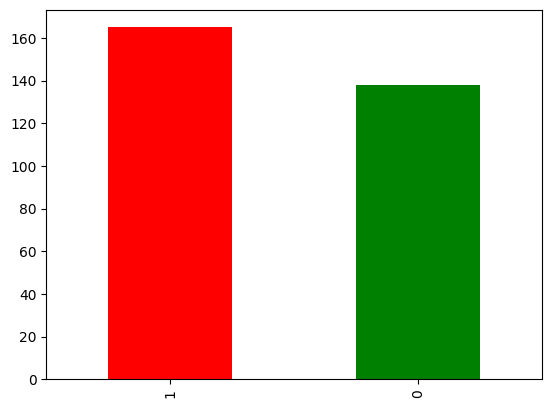

In [ ]:
# getting the number of values of each class in Potability i.e target
data.target.value_counts()

data.target.value_counts().plot(kind='bar', color=["red","green"])
plt.show()

here 1 -> heart with disease
     0 -> heart without disease

### Partitioning the data

Splitting the features and target

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']

Splitting the dataset into training data and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 2)

## Model training

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Fit the Decision Tree Classifier to the training data
model_dt.fit(X_train, Y_train)

# Make predictions on the test set using the Decision Tree Classifier
y_pred_dt = model_dt.predict(X_test)

# Evaluate the accuracy of the Decision Tree Classifier
accuracy_decision_tree = accuracy_score(Y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_decision_tree)

dt_confusion_matrix = confusion_matrix(Y_test, y_pred_dt)
print("Decision Tree Classifier confusion matrix: ", dt_confusion_matrix)

Decision Tree Classifier Accuracy: 0.8032786885245902
Decision Tree Classifier confusion matrix:  [[20  8]
 [ 4 29]]


## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model_rf = RandomForestClassifier()

# Fit the Random Forest Classifier to the training data
model_rf.fit(X_train, Y_train)

# Make predictions on the test set using the Random Forest Classifier
y_pred_rf = model_rf.predict(X_test)

# Evaluate the accuracy of the Random Forest Classifier
accuracy_random_forest = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_random_forest)

rf_confusion_matrix = confusion_matrix(Y_test, y_pred_rf)
print("Random Forest Classifier confusion matrix: ", rf_confusion_matrix)

Random Forest Classifier Accuracy: 0.7540983606557377
Random Forest Classifier confusion matrix:  [[20  8]
 [ 7 26]]


## KNN

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X_train = np.array(X)
        self.Y_train = np.array(Y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [ ]:
# fitting the data on model
model_knn = KNN(k=5)
model_knn.fit(X_train, Y_train)
knn_predictions = model_knn.predict(X_test)

knn_accuracy_score = accuracy_score(Y_test, knn_predictions)
print("KNN accuracy score: ", knn_accuracy_score)

knn_confusion_matrix = confusion_matrix(Y_test, knn_predictions)
print("KNN confusion matrix: ", knn_confusion_matrix)

KNN accuracy score:  0.6229508196721312
KNN confusion matrix:  [[16 12]
 [11 22]]


### Choosing the optimal k

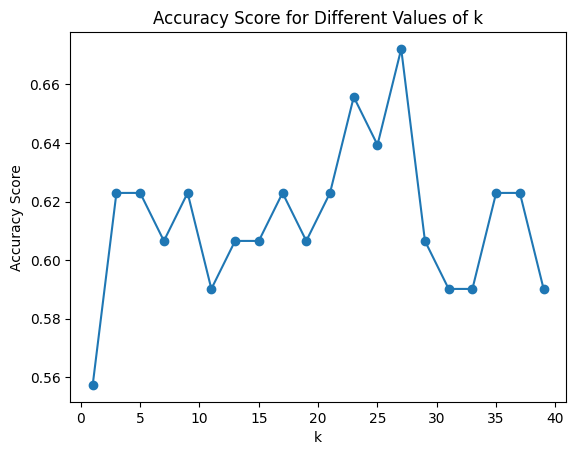

In [ ]:
# Define a list of k values (odd numbers from 1 to 100)
k_values = list(range(1, 41, 2))

# Create lists to store accuracy scores
accuracy_scores = []

# Iterate over different k values
for k in k_values:
    model_knn = KNN(k=k)
    model_knn.fit(X_train, Y_train)
    predictions = model_knn.predict(X_test)
    knn_accuracy_score = accuracy_score(Y_test, predictions)
    accuracy_scores.append(knn_accuracy_score)

# Plot the accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of k')
plt.show()

In [ ]:
# finding k for which accuracy is maximum
max_accuracy_index = np.argmax(accuracy_scores)

k_max = k_values[max_accuracy_index]
print("k for which accuracy is max: ",k_max)
max_accuracy = accuracy_scores[max_accuracy_index]
print("max accuracy: ",max_accuracy)

k for which accuracy is max:  27
max accuracy:  0.6721311475409836


## Naive Bayes Classifier

In [ ]:

class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = None
        self.class_likelihoods = None
        self.classes = None

    def fit(self, X, Y):
        self.classes = np.unique(Y)
        self.class_priors = {c: np.mean(Y == c) for c in self.classes}

        self.class_likelihoods = {}
        for c in self.classes:
            X_c = X[Y == c]
            class_mean = X_c.mean(axis=0)
            class_variance = X_c.var(axis=0)
            self.class_likelihoods[c] = {"mean": class_mean, "var": class_variance}

        return self

    def _pdf(self, x, mean, var):
        eps = 1e-8
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(np.square(x - mean) / (2.0 * var + eps)))
        return coeff * exponent

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values

        predictions = []
        for i in range(len(X)):
            posterior_probs = {
                c: np.sum(np.log(self._pdf(X[i], self.class_likelihoods[c]["mean"], self.class_likelihoods[c]["var"]))) + np.log(self.class_priors[c])
                for c in self.classes
            }
            predicted_class = max(posterior_probs, key=posterior_probs.get)
            predictions.append(predicted_class)

        return np.array(predictions)



In [ ]:
# fitting the data on model

model_nb = NaiveBayesClassifier()
model_nb.fit(X_train, Y_train)
nb_predictions = model_nb.predict(X_test)

nb_accuracy_score = accuracy_score(nb_predictions, Y_test)
print("Naive Bayes Classifier accuracy score: ",nb_accuracy_score)

nb_confusion_matrix = confusion_matrix(nb_predictions, Y_test)
print("Naive Bayes Classifier confusion matrix: ",nb_confusion_matrix)

Naive Bayes Classifier accuracy score:  0.819672131147541
Naive Bayes Classifier confusion matrix:  [[25  8]
 [ 3 25]]


## Logistic regression

In [ ]:
class Logistic_Regression():


  # declaring learning rate(α) & number of iterations
  def __init__(self, learning_rate, iterations):

    self.learning_rate = learning_rate
    self.iterations = iterations

  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  =  m
    # number of input features in the dataset (number of columns)  = n
    self.m, self.n = X.shape

    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent for Optimization
    for i in range(self.iterations):
      self.update_weights()

  def update_weights(self):

    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))

    # derivaties
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)

    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred


In [ ]:
model_lg = Logistic_Regression(0.0001,100000)

#training the logistic regression model with training data
model_lg.fit(X_train, Y_train)

lg_predictions = model_lg.predict(X_test)
testing_data_accuracy = accuracy_score(lg_predictions, Y_test)

lg_accuracy_score = accuracy_score(lg_predictions, Y_test)
print("Logistic Regression accuracy score: ",lg_accuracy_score)

lg_confusion_matrix = confusion_matrix(lg_predictions, Y_test)
print("Logistic Regression confusion matrix: ",lg_confusion_matrix)

Logistic Regression accuracy score:  0.8524590163934426
Logistic Regression confusion matrix:  [[24  5]
 [ 4 28]]
